# Week 1 Stats for DS Exercises

Tuomas Vuontisjärvi 4.9.2025

## Note on LLM Usage

I originally did written problems in latex, but later realised that it is better to have everything in this file. I asked chatGPT-4o to transform my original latex code to markdown friendly format and used that here.

Please ask for the original latex if you wish to verify.

I also used chatGPT-4o support for reminding me of the concepts and formulas relevant here. Here are a few example prompts I used.

* Tell me about unifiorm probability a -> b
* Explain variance. What is variance of random.randint(0,1)?
* Expected value for randint(-10, 10) should be the same as randint(-1,1) but variance is higher for first?
* how to write math equations in markdown in jupyter notebook
* Explain variance formulas. Are they specific case specific?
* Explain in words what does it mean when random variable Y is the square of some other variable
* Explain 2-dimensional multivariate Normal
* explain poisson distribution
* How to solve probality X_1 = Poisson(lambda_1) P(X_1 = k)

I also asked for coding examples to aid in programming exercise. Example prompts:

* how to print text to matplot lib?
* help generage Gamma(1,1) sample
* help get lognorm sample
* list possible matplotlib colors
* What is plt.legend()?
* Explain plotting a single histogram with matplotlib
* Make nicer f string print: print(X_mean, Y_mean)

Only print formatting code was used in here

### Problem 1.1
There are three cards. The first is green on both sides, the second is red on both sides, and the third is green on one side and red on the other.  
We choose a card at random and we see one side (also chosen at random).  
If the side we see is green, what is the probability that the other side is also green?

**Solution**

$$
\begin{aligned}
\mathbb{P}(\text{Fully green card}) &= \tfrac{1}{3} \\
\mathbb{P}(\text{Observed green card}) &= \tfrac{1}{2} \\
\mathbb{P}(\text{Fully green card} \mid \text{Observed green}) &= 
\frac{\mathbb{P}(\text{Fully green card} \cap \text{Observed green})}{\mathbb{P}(\text{Observed green})} \\
\mathbb{P}(\text{Fully green card} \mid \text{Observed green}) &= 
\frac{\tfrac{1}{3} \times 1}{\tfrac{1}{2}} = \tfrac{2}{3}
\end{aligned}
$$

In [33]:
# numerical solution for above task
from random import randint, shuffle
cards = [('green','green'), ('green','red'), ('red','red')]
fully_green, first_green = 0, 0
for _ in range(10**5):
    shuffle(cards)
    side = randint(0, 1)
    if cards[0][side] == 'green':
        first_green += 1
        if cards[0][1 - side] == 'green':
            fully_green += 1
print(f"{fully_green*100/first_green:.2f}%")

66.92%



### Problem 1.2
Assume boys and girls are born independently at a 50/50 ratio.  
A family with two children is known to have one girl.  
What is the probability that the other child is a boy?

**Solution**

$$
\begin{aligned}
\mathbb{P}(\text{Exactly one boy} \mid \text{At least one girl}) &=
\frac{\mathbb{P}(\text{Exactly one boy} \cap \text{At least one girl})}{\mathbb{P}(\text{At least one girl})} \\
\mathbb{P}(\text{Exactly one boy} \cap \text{At least one girl}) &= \tfrac{1}{2} \times 1 = \tfrac{1}{2} \\
\mathbb{P}(\text{Exactly one boy} \mid \text{At least one girl}) &= 
\frac{\tfrac{1}{2}}{\tfrac{3}{4}} \\
\mathbb{P}(\text{Exactly one boy} \mid \text{At least one girl}) &= \tfrac{2}{3}
\end{aligned}
$$

# Exercise 2

In [ ]:
# numerical solution for above task
from random import randint
genders = ['boy', 'girl']
atleast_one_girl, other_child_boy = 0, 0
for _ in range(10**5):
    kids = [genders[randint(0,1)], genders[randint(0,1)]]
    if 'girl' in kids:
        atleast_one_girl += 1
        if 'boy' in kids:
            other_child_boy += 1
print(f"{other_child_boy*100/atleast_one_girl:.2f}%")

66.76%


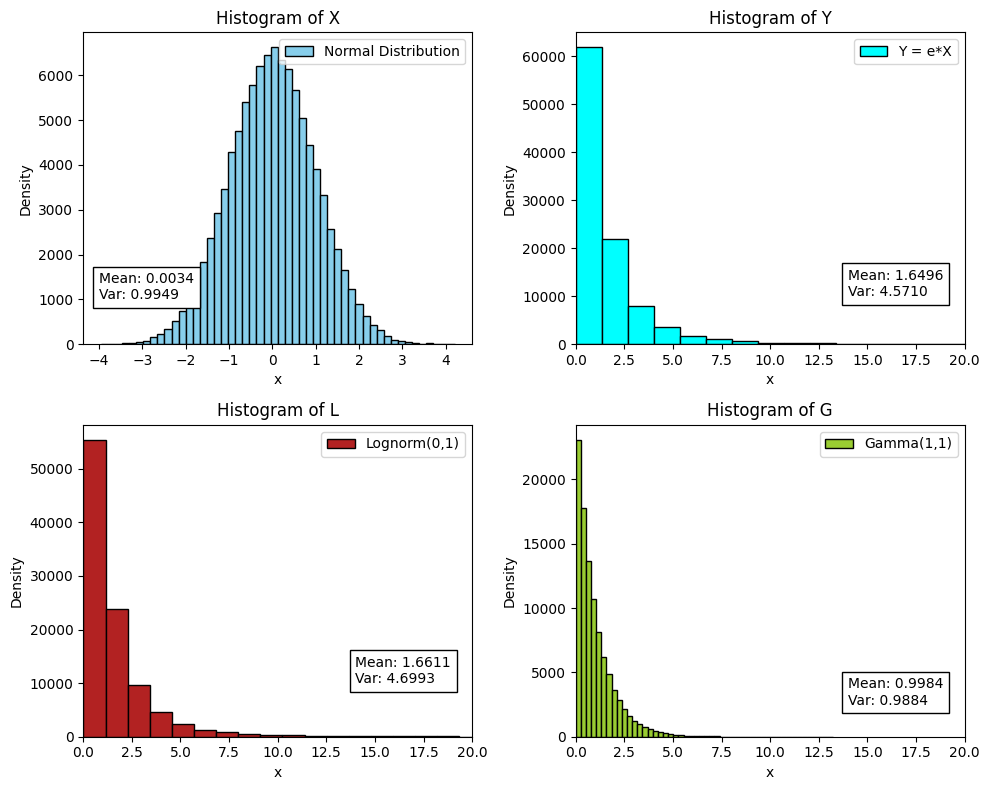

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 10**5  

X = np.random.normal(loc=0, scale=1, size=n)
Y = np.exp(X)
L = np.random.lognormal(mean=0, sigma=1, size=10**5)
G = np.random.gamma(shape=1, scale=1, size=10**5)

plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.hist(X, bins=50, color='skyblue', edgecolor='black', label='Normal Distribution')
plt.title("Histogram of X")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.text(-4, 1000, f"Mean: {np.mean(X):.4f}\nVar: {np.var(X):.4f}",
         fontsize=10, bbox=dict(facecolor='white'))

plt.subplot(2, 2, 2)
plt.hist(Y, bins=50, color='aqua', edgecolor='black', label='Y = e*X')
plt.xlim(0, 20)
plt.title("Histogram of Y")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.text(14, 10000, f"Mean: {np.mean(Y):.4f}\nVar: {np.var(Y):.4f}",
         fontsize=10, bbox=dict(facecolor='white'))

plt.subplot(2, 2, 3)
plt.hist(L, bins=50, color='firebrick', edgecolor='black', label='Lognorm(0,1)')
plt.xlim(0, 20)
plt.title("Histogram of L")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.text(14, 10000, f"Mean: {np.mean(L):.4f}\nVar: {np.var(L):.4f}",
         fontsize=10, bbox=dict(facecolor='white'))

plt.subplot(2, 2, 4)
plt.hist(G, bins=50, color='yellowgreen', edgecolor='black', label='Gamma(1,1)')
plt.xlim(0, 20)
plt.title("Histogram of G")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.text(14, 2500, f"Mean: {np.mean(G):.4f}\nVar: {np.var(G):.4f}",
         fontsize=10, bbox=dict(facecolor='white'))

plt.tight_layout()
plt.show()

## Problem 3

#### Comment on LLM use.

Originally this was written in pure latex format and I asked chatGpt to transform it to markdown friendly format


#### 3.1

Consider a case where $X \sim \text{Unif}(-1,1)$ and $Y = X^2$.  
Compute the covariance between $X$ and $Y$.

---

#### Solve $E[X]$

$$
\begin{aligned}
E[X] &= \frac{a+b}{2} \\
E[X] &= \frac{-1 + 1}{2} \\
E[X] &= 0
\end{aligned}
$$

---

#### Solve $E[Y]$

$$
\begin{aligned}
E[Y] &= E[X^2] \\
f_X(x) &= \frac{1}{2} \\
E[X^2] &= \int_{-1}^1 x^2 \cdot f_X(x)\, dx \\
E[X^2] &= \tfrac{1}{2} \int_{-1}^1 x^2 \, dx \\
E[X^2] &= 2 \cdot \tfrac{1}{2} \int_0^1 x^2 \, dx \\
E[X^2] &= 2 \cdot \tfrac{1}{2} \cdot \frac{x^3}{3}\Big|_0^1 \\
E[X^2] &= \frac{1}{3}
\end{aligned}
$$

---

#### Solve $E[XY]$

$$
\begin{aligned}
E[XY] &= E[X^3] \\
E[X^3] &= \int_{-1}^1 x^3 \cdot f_X(x)\, dx \\
E[X^3] &= f_X(x) \cdot \int_{-1}^1 x^3 \, dx \\
E[X^3] &= \tfrac{1}{2} \int_{-1}^1 x^3 \, dx \quad \text{(the integral is 0 due to symmetry)} \\
E[X^3] &= \tfrac{1}{2} \cdot 0 \\
E[X^3] &= 0
\end{aligned}
$$

---

#### Solve $\text{Cov}(X,Y)$

$$
\begin{aligned}
\text{Cov}(X, Y) &= \mathbb{E}[XY] - \mathbb{E}[X] \cdot \mathbb{E}[Y] \\
\text{Cov}(X, Y) &= 0 - 0 \cdot \tfrac{1}{3} \\
\text{Cov}(X, Y) &= 0
\end{aligned}
$$

#### 3.2 Consider what this tells about the relationship between covariance and dependence among random variables.

Covariance of 1 means there is high linear relation between to random variables.

However, the example shows that variables can be highly dependent (Y is completely dependent on X) yet have no linear relation.

In [30]:
# numerical solution for above task
import numpy as np
X = np.random.uniform(-1, 1, size=100_000)
Y = X**2
mean_X = np.mean(X)
mean_Y = np.mean(Y)
cov_XY = np.mean((X - mean_X) * (Y - mean_Y))
print(f"Sample Cov(X, Y): {cov_XY:.6f}")

Sample Cov(X, Y): -0.000532


# Exercise 4

In [29]:
import scipy

mu = np.array([0, 1])
Sigma = np.array([[1, 0.5],
                  [0.5, 2]])

sample = scipy.stats.multivariate_normal(mean=mu, cov=Sigma).rvs(size=1000)
col_sum = np.sum(sample, axis=1)
marginal_sum_mean = np.mean(col_sum) # mean of X_1 + X_2
marginal_sum_var = np.var(col_sum) # var of X_1 + X_2

sum_of_means = np.mean(sample[:,0]) + np.mean(sample[:,1])
sum_of_vars = np.var(sample[:,0]) + np.var(sample[:,1])

print(f"Marginal sum → mean: {marginal_sum_mean:.4f}, variance: {marginal_sum_var:.4f}")
print(f"Sum of parts → mean: {sum_of_means:.4f}, variance: {sum_of_vars:.4f}")


Marginal sum → mean: 1.1762, variance: 4.4609
Sum of parts → mean: 1.1762, variance: 3.2117


Marginal mean $X_1 + X_2 \approx 1$ \
$E[X_1] + E[X_2] = 0 + 1 = 1$


Marginal var $X_1 + X_2 \approx 4$\
$Var(X_1) + Var(X_2) = 1 + 2 = 3$

The mean of sums is the same as the sum of expected values $E[X_1] + E[X_2]$

The var of sums is not the same as the sum of variances $Var(X_1) + Var(X_2)$

But $Var(X_1) + Var(X_2)$ is the same as calculated sum of sample vars: `sum_of_vars = np.var(sample[:,0]) + np.var(sample[:,1])`


# Exercise 5
Consider random variables $X_1,X_2$
 that follow Poisson distributions $\lambda_1,\lambda_2$. Your task is to show that the conditional random variable $X_1 | X_1 + X_2 = k$
 follows a Binomial distribution. Do this with the following subtasks


Binomial distribution formula:

$f(k,n,p)=\Pr(X=k)=\binom{n}{k}p^k(1-p)^{n-k}$

The binomial coefficient

$\binom{k}{i} = \frac{k!}{(k-i)! i!} $

Binomial expansion:

$(a+b)^k = \sum_{i=0}^k \binom{k}{i}a^{k-i}b^i $

## 5.1


Solve the probability of $\Pr(X_1 + X_2 = k)$

$$
\begin{aligned}
\Pr(X_1 + X_2 = k) &= P(X_1 = k \cap X_2 = 0) + P(X_1 = k - 1 \cap X_2 = 1) + ... + P(X_1 = 0 \cap X_2 = k) \\
\Pr(X_1 + X_2 = k) &= P(X_1 = k )\times\Pr( X_2 = 0) + P(X_1 = k - 1 )\times\Pr( X_2 = 1) + ... + P(X_1 = 0 )\times\Pr( X_2 = k)\\
\end{aligned}
$$
Insert Poisson formula

$$
\begin{aligned}
\Pr(X_1 + X_2 = k) &= \frac{\lambda_1^k}{k!}e^{-\lambda_1} \times \frac{\lambda_2^0}{0!}e^{-\lambda_2} + \frac{\lambda_1^{k-1}}{(k-1)!}e^{-\lambda_1} \times \frac{\lambda_2^1}{1!}e^{-\lambda_2}+ ... + \frac{\lambda_1^0}{0!}e^{-\lambda_1} \times \frac{\lambda_2^k}{k!}e^{-\lambda_2}\\
\Pr(X_1 + X_2 = k) &= (\frac{\lambda_1^k}{k!} \times \frac{\lambda_2^0}{0!} + \frac{\lambda_1^{k-1}}{(k-1)!} \times \frac{\lambda_2^1}{1!} + ... + \frac{\lambda_1^0}{0!} \times \frac{\lambda_2^k}{k!})e^{-(\lambda_2+\lambda_1)}\\
\Pr(X_1 + X_2 = k) &= (\lambda_1^{k-0}\lambda_2^{0}\times\frac{1}{k!0!} + ... + \lambda_1^{0}\lambda_2^{k}\times\frac{1}{0!k!})e^{-(\lambda_2+\lambda_1)}\\
\end{aligned}
$$
Write as summation of variables
$$
\begin{aligned}
\Pr(X_1 + X_2 = k) &= e^{-(\lambda_2+\lambda_1)} \sum_{i=0}^k \lambda_1^{k-i}\lambda_2^i\times\frac{1}{(k-i)!i!} \\
\end{aligned}
$$
Multiply right side with and divide left side by $k!$ 

$$
\begin{aligned}
\Pr(X_1 + X_2 = k) &= \frac{ e^{-(\lambda_2+\lambda_1)}}{k!} \sum_{i=0}^k \lambda_1^{k-i}\lambda_2^i\times\frac{k!}{(k-i)!i!} \\
\end{aligned}
$$
Write $\frac{k!}{(k-i)!i!}$ as binomial coefficient $\binom{k}{i}$
$$
\begin{aligned}
\Pr(X_1 + X_2 = k) &= \frac{ e^{-(\lambda_2+\lambda_1)}}{k!} \sum_{i=0}^k \lambda_1^{k-i}\lambda_2^i\times\binom{k}{i} \\
\end{aligned}
$$
replace right side with $(\lambda_1 + \lambda_2)^k$ using binomial expansion
$$
\begin{aligned}
\Pr(X_1 + X_2 = k) &= \frac{ e^{-(\lambda_2+\lambda_1)}}{k!} (\lambda_1 + \lambda_2)^k \\
\Pr(X_1 + X_2 = k) &= \frac{ (\lambda_1 + \lambda_2)^k e^{-(\lambda_2+\lambda_1)}}{k!} \\
\end{aligned}
$$


## 5.2.

Solve the joint probability of  $\Pr(X_1 + X_2 = k, X_1 = l)$. If $X_1 = l$ then $X_2 = k - l$

$$
\begin{aligned}
\Pr(X_1 + X_2 = k, X_1 = l)  &= \Pr(X_2 = k - l \cap X_1 = l)\\
&= \Pr(X_2 = k - l) \times \Pr(X_1 = l)\\
\end{aligned}
$$
Insert Poisson formula
$$
\begin{aligned}
\Pr(X_2 = k - l \cap X_1 = l) &= \frac{\lambda_1 ^l e^{-\lambda_1}}{l!} \times \frac{\lambda_2^{k-l} e^{-\lambda_2}}{(k-l)!} \\
\Pr(X_2 = k - l \cap X_1 = l) &= \frac{e^{-(\lambda_1 + \lambda_2)}}{l!(k-l!)}\lambda_1 ^l \lambda_2^{k-l} \\
\Pr(X_2 = k - l \cap X_1 = l) &= \lambda_1 ^l \lambda_2^{k-l}e^{-(\lambda_1 + \lambda_2)}\frac{1}{l!(k-l!)} \\
\Pr(X_2 = k - l \cap X_1 = l) &= \lambda_1 ^l \lambda_2^{k-l}\frac{e^{-(\lambda_1 + \lambda_2)}}{k!} \frac{k!}{l!(k-l!)} \\
\Pr(X_2 = k - l \cap X_1 = l) &= \lambda_1 ^l \lambda_2^{k-l}\frac{e^{-(\lambda_1 + \lambda_2)}}{k!} \binom{k}{l} \\
\end{aligned}
$$

## 5.3

Apply the Bayes Theorem to obtain the $\Pr(X_1=l|X_1 + X_2 = k)$ and report the corresponding parameters for the Binomial distribution.

$$
\begin{aligned}
\Pr(X_1 = l) &= \frac{ \lambda_1^k e^{-\lambda_1}}{k!}\\
\Pr(X_2 = k - l) &= \frac{ \lambda_2^{k-l} e^{-\lambda_2}}{(k-l)!}\\
\end{aligned}
$$
Bayes theorem:
$$
\begin{aligned}
\Pr(A|B) &= \frac{\Pr(A\cap B)}{\Pr(B)}, \Pr(B) > 0\\
\end{aligned}
$$
Insert values to bayes theorem
$$
\begin{aligned}
\Pr(X_1 = l | X_1 + X_2 = k) &= \frac{\Pr(X_1 = l\cap  X_1 + X_2 = k)}{\Pr(X_1 + X_2 = k)}\\
 &= \frac{\Pr(X_2 = k - l \cap X_1 = l)}{\Pr(X_1 + X_2 = k)}\\
\end{aligned}
$$

Binomial distribution formula:

$f(k,n,p)=\Pr(X=k)=\binom{n}{k}p^k(1-p)^{n-k}$


Insert previously solved formulas

$$
\begin{aligned}
 &= \frac{\lambda_1 ^l \lambda_2^{k-l}\frac{e^{-(\lambda_1 + \lambda_2)}}{k!} \binom{k}{l}}{(\lambda_1 + \lambda_2)^k\frac{  e^{-(\lambda_2+\lambda_1)}}{k!} }\\
 &= \binom{k}{l}\frac{\lambda_1 ^l \lambda_2^{k-l} }{(\lambda_1 + \lambda_2)^k }\\
 &= \binom{k}{l}(\frac{\lambda_1}{(\lambda_1 + \lambda_2)})^l(\frac{\lambda_2}{(\lambda_1 + \lambda_2)})^{k-l}\\
\end{aligned}
$$

Comparing to Binomial distribution Formula:

$f(k,l,p)=\Pr(X=k)=\binom{k}{l}p^k(1-p)^{n-k}$

$f(k,l,p)=\Pr(X_1=l|X_1 + X_2 = k)=\binom{k}{l}(\frac{\lambda_1}{(\lambda_1 + \lambda_2)})^l(\frac{\lambda_2}{(\lambda_1 + \lambda_2)})^{k-l}$

where $p=\frac{\lambda_1}{(\lambda_1 + \lambda_2)}$
